In [1]:
!curl https://raw.githubusercontent.com/toonnyy8/ncku/master/dsp2020/hw4/singing16k16bit-clean.wav -o singing16k16bit-clean.wav
!curl https://raw.githubusercontent.com/toonnyy8/ncku/master/dsp2020/hw4/singingWithPhoneRing16k16bit-noisy.wav -o singingWithPhoneRing16k16bit-noisy.wav

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  291k  100  291k    0     0  7293k      0 --:--:-- --:--:-- --:--:-- 7293k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  319k  100  319k    0     0  8201k      0 --:--:-- --:--:-- --:--:-- 8201k


In [2]:
import librosa
import scipy
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

from IPython.display import Audio

In [3]:
clean_speech = librosa.audio.load("./singing16k16bit-clean.wav",16000)[0]
Audio(clean_speech,rate=16000)

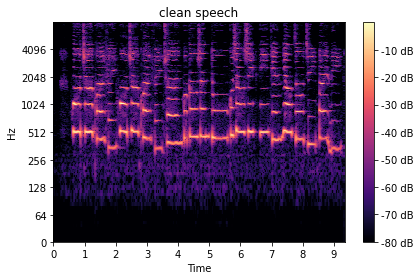

In [4]:
clean_speech_power = np.abs(librosa.stft(clean_speech))
librosa.display.specshow(librosa.power_to_db(clean_speech_power ** 2, ref=np.max),
                         sr=16000, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('clean speech')
plt.tight_layout()
plt.show()

In [5]:
noisy_speech = librosa.audio.load("./singingWithPhoneRing16k16bit-noisy.wav",16000)[0][:len(clean_speech)]
Audio(noisy_speech,rate=16000)

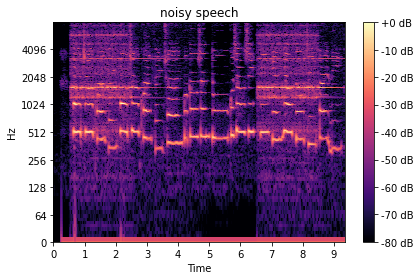

In [6]:
noisy_speech_power = np.abs(librosa.stft(noisy_speech))
librosa.display.specshow(librosa.power_to_db(noisy_speech_power ** 2, ref=np.max),
                         sr=16000, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('noisy speech')
plt.tight_layout()
plt.show()

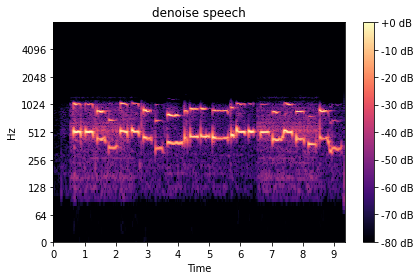

In [7]:
b1, a1 = scipy.signal.butter(8,(100),"highpass",False,"ba",16000)
denoise_speech = scipy.signal.filtfilt(b1, a1, noisy_speech)

b2, a2 = scipy.signal.butter(12,(1000),"lowpass",False,"ba",16000)
denoise_speech = scipy.signal.filtfilt(b2, a2, denoise_speech)

denoise_speech_power = np.abs(librosa.stft(denoise_speech))
librosa.display.specshow(librosa.power_to_db(denoise_speech_power ** 2, ref=np.max),
                         sr=16000, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('denoise speech')
plt.tight_layout()
plt.show()

In [8]:
denoise_speech = np.float32(denoise_speech)
Audio(denoise_speech,rate=16000)

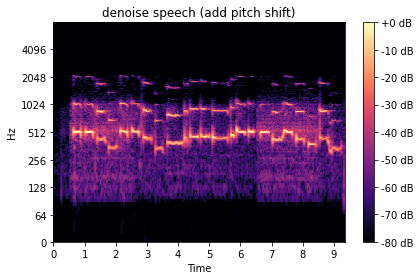

In [9]:
# 將移除掉的諧波補回一些
denoise_speech_add_pitch_shift = denoise_speech + librosa.effects.pitch_shift(denoise_speech, 16000, n_steps=12) * 0.1

denoise_speech_add_pitch_shift_power = np.abs(librosa.stft(denoise_speech_add_pitch_shift))
librosa.display.specshow(librosa.power_to_db(denoise_speech_add_pitch_shift_power ** 2, ref=np.max),
                         sr=16000, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('denoise speech (add pitch shift)')
plt.tight_layout()
plt.show()

In [10]:
denoise_speech_add_pitch_shift = np.float32(denoise_speech_add_pitch_shift)
Audio(denoise_speech_add_pitch_shift,rate=16000)